In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset and check the data head.
df= pd.read_csv('weather_2020-11.csv')

In [3]:
df

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3
...,...,...,...
8359,2020-11-30T00:00:00Z,WD_PT1H_AVG,138.0
8360,2020-11-30T00:00:00Z,PRA_PT1H_ACC,NaN
8361,2020-11-30T00:00:00Z,PRI_PT1H_MAX,NaN
8362,2020-11-30T00:00:00Z,PA_PT1H_AVG,1026.9


In [4]:
df["ParameterName"].value_counts()

TA_PT1H_AVG       697
TA_PT1H_MAX       697
TA_PT1H_MIN       697
RH_PT1H_AVG       697
WS_PT1H_AVG       697
WS_PT1H_MAX       697
WS_PT1H_MIN       697
WD_PT1H_AVG       697
PRA_PT1H_ACC      697
PRI_PT1H_MAX      697
PA_PT1H_AVG       697
WAWA_PT1H_RANK    697
Name: ParameterName, dtype: int64

In [5]:
df.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


In [6]:
#check the rows and columns number.
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 8364 and number of columns:--> 3


In [7]:
df.isnull().sum()


Time                 0
ParameterName        0
ParameterValue    2135
dtype: int64

In [8]:
#chack the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time            8364 non-null   object
 1   ParameterName   8364 non-null   object
 2   ParameterValue  6229 non-null   object
dtypes: object(3)
memory usage: 196.2+ KB


In [9]:
#check for missing values 
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
ParameterValue,2135,0.255261
Time,0,0.000000
ParameterName,0,0.000000


In [10]:
# Replace null values with zero
df=df.dropna()


In [11]:
df.isnull().sum()

Time              0
ParameterName     0
ParameterValue    0
dtype: int64

In [12]:
df.shape

(6229, 3)

In [13]:
df

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3
...,...,...,...
8356,2020-11-30T00:00:00Z,WS_PT1H_AVG,1.7
8357,2020-11-30T00:00:00Z,WS_PT1H_MAX,2.2
8358,2020-11-30T00:00:00Z,WS_PT1H_MIN,1.1
8359,2020-11-30T00:00:00Z,WD_PT1H_AVG,138.0


In [14]:
df.dtypes

Time              object
ParameterName     object
ParameterValue    object
dtype: object

In [15]:
df['ParameterValue'].value_counts()

3.0       90
3.1       83
2.5       81
2.3       80
3.3       75
          ..
1023.8     1
1023.9     1
1024.2     1
1024.4     1
1027.6     1
Name: ParameterValue, Length: 807, dtype: int64

In [16]:
(df['ParameterValue'] == 'test').sum()



4

In [17]:
df = df[df['ParameterValue'] != 'test']

In [18]:
df.shape

(6225, 3)

In [19]:
df

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3
...,...,...,...
8356,2020-11-30T00:00:00Z,WS_PT1H_AVG,1.7
8357,2020-11-30T00:00:00Z,WS_PT1H_MAX,2.2
8358,2020-11-30T00:00:00Z,WS_PT1H_MIN,1.1
8359,2020-11-30T00:00:00Z,WD_PT1H_AVG,138.0


In [20]:
df.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


In [21]:
# # Separate categorical and numerical columns
# categorical_cols = df.select_dtypes(include=['object']).columns

# Convert 'col1' to float
df['ParameterValue'] = df['ParameterValue'].astype(float)

In [22]:
df.dtypes

Time               object
ParameterName      object
ParameterValue    float64
dtype: object

In [23]:
# # Perform EDA for categorical columns
# for col in categorical_cols:
#     print(f"Column: {col}")
#     print(f"Value counts:\n{df[col].value_counts()}\n")

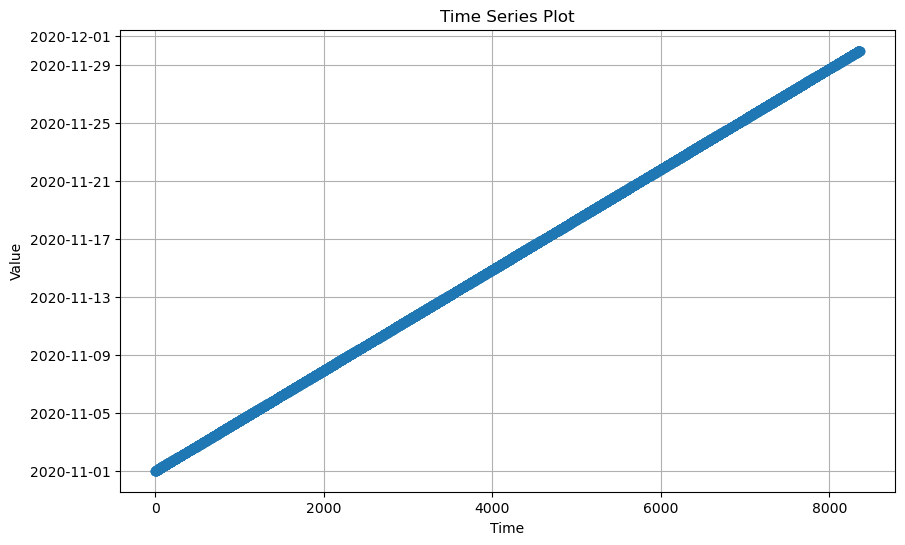

In [24]:
# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Plot time series
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], marker='o', linestyle='-')
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()



In [25]:
# Convert 'ParameterValue' column to numeric (if not already numeric)
df['ParameterValue'] = pd.to_numeric(df['ParameterValue'], errors='coerce')

# Filter and compute average values for each parameter
average_values = {
    'Relative Humidity': df.loc[df['ParameterName'] == 'RH_PT1H_AVG', 'ParameterValue'].mean(),
    'Temperature Average': df.loc[df['ParameterName'] == 'TA_PT1H_AVG', 'ParameterValue'].mean(),
    'Wind Speed': df.loc[df['ParameterName'] == 'WS_PT1H_AVG', 'ParameterValue'].mean(),
    'Precipitation Amount': df.loc[df['ParameterName'] == 'WD_PT1H_AVG', 'ParameterValue'].mean(),
    'Pressure Average': df.loc[df['ParameterName'] == 'PA_PT1H_AVG', 'ParameterValue'].mean()
}

# Print average values
for parameter, average_value in average_values.items():
    print(f"Average {parameter}: {average_value}")


Average Relative Humidity: 87.90138674884437
Average Temperature Average: 2.740028694404592
Average Wind Speed: 3.9007173601147813
Average Precipitation Amount: 208.79340028694403
Average Pressure Average: 1012.6341463414637


In [26]:
df["ParameterName"].value_counts()

TA_PT1H_AVG    697
TA_PT1H_MAX    697
TA_PT1H_MIN    697
WS_PT1H_AVG    697
WS_PT1H_MAX    697
WS_PT1H_MIN    697
WD_PT1H_AVG    697
PA_PT1H_AVG    697
RH_PT1H_AVG    649
Name: ParameterName, dtype: int64

In [27]:
df.head(10)

,Time,ParameterName,ParameterValue
0,2020-11-01 00:00:00+00:00,TA_PT1H_AVG,6.5
1,2020-11-01 00:00:00+00:00,TA_PT1H_MAX,6.6
2,2020-11-01 00:00:00+00:00,TA_PT1H_MIN,6.3
3,2020-11-01 00:00:00+00:00,RH_PT1H_AVG,95.0
4,2020-11-01 00:00:00+00:00,WS_PT1H_AVG,3.3
5,2020-11-01 00:00:00+00:00,WS_PT1H_MAX,3.5
6,2020-11-01 00:00:00+00:00,WS_PT1H_MIN,3.0
7,2020-11-01 00:00:00+00:00,WD_PT1H_AVG,177.0
10,2020-11-01 00:00:00+00:00,PA_PT1H_AVG,1023.5
12,2020-11-01 01:00:00+00:00,TA_PT1H_AVG,6.4


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 8362
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Time            6225 non-null   datetime64[ns, UTC]
 1   ParameterName   6225 non-null   object             
 2   ParameterValue  6225 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 194.5+ KB


In [29]:
# Calculate the mean of a single column
df['ParameterValue'].mean()


148.16016064257093

In [30]:
# Extract unique parameter names
parameters = df['ParameterName'].unique()

# Initialize arrays to store statistics
min_values = np.zeros(len(parameters))
max_values = np.zeros(len(parameters))
median_values = np.zeros(len(parameters))
hour_with_highest_value = np.zeros(len(parameters))

# Iterate over each parameter
for i, parameter in enumerate(parameters):
    # Extract values for the current parameter
    parameter_values = df[df['ParameterName'] == parameter]['ParameterValue'].values
    
    # Calculate statistics
    min_values[i] = np.min(parameter_values)
    max_values[i] = np.max(parameter_values)
    median_values[i] = np.median(parameter_values)
    
    # Find the index of the hour with the highest value
    hour_with_highest_value[i] = np.argmax(parameter_values)
    
    # Print results for each parameter
    print(f"Parameter: {parameter}")
    print(f"Minimum value: {min_values[i]}")
    print(f"Maximum value: {max_values[i]}")
    print(f"Median value: {median_values[i]}")
    print(f"Hour with the highest value: {hour_with_highest_value[i]}\n")

Parameter: TA_PT1H_AVG
Minimum value: -8.4
Maximum value: 10.9
Median value: 2.8
Hour with the highest value: 54.0

Parameter: TA_PT1H_MAX
Minimum value: -7.8
Maximum value: 11.1
Median value: 3.0
Hour with the highest value: 54.0

Parameter: TA_PT1H_MIN
Minimum value: -9.1
Maximum value: 10.9
Median value: 2.5
Hour with the highest value: 54.0

Parameter: RH_PT1H_AVG
Minimum value: 61.0
Maximum value: 100.0
Median value: 89.0
Hour with the highest value: 231.0

Parameter: WS_PT1H_AVG
Minimum value: 0.4
Maximum value: 10.3
Median value: 3.7
Hour with the highest value: 36.0

Parameter: WS_PT1H_MAX
Minimum value: 0.7
Maximum value: 12.3
Median value: 4.4
Hour with the highest value: 38.0

Parameter: WS_PT1H_MIN
Minimum value: 0.1
Maximum value: 9.5
Median value: 3.1
Hour with the highest value: 36.0

Parameter: WD_PT1H_AVG
Minimum value: 4.0
Maximum value: 359.0
Median value: 188.0
Hour with the highest value: 634.0

Parameter: PA_PT1H_AVG
Minimum value: 977.3
Maximum value: 1032.6
Medi

In [31]:
df["ParameterName"].value_counts()

TA_PT1H_AVG    697
TA_PT1H_MAX    697
TA_PT1H_MIN    697
WS_PT1H_AVG    697
WS_PT1H_MAX    697
WS_PT1H_MIN    697
WD_PT1H_AVG    697
PA_PT1H_AVG    697
RH_PT1H_AVG    649
Name: ParameterName, dtype: int64

In [32]:
df.head()

,Time,ParameterName,ParameterValue
0,2020-11-01 00:00:00+00:00,TA_PT1H_AVG,6.5
1,2020-11-01 00:00:00+00:00,TA_PT1H_MAX,6.6
2,2020-11-01 00:00:00+00:00,TA_PT1H_MIN,6.3
3,2020-11-01 00:00:00+00:00,RH_PT1H_AVG,95.0
4,2020-11-01 00:00:00+00:00,WS_PT1H_AVG,3.3


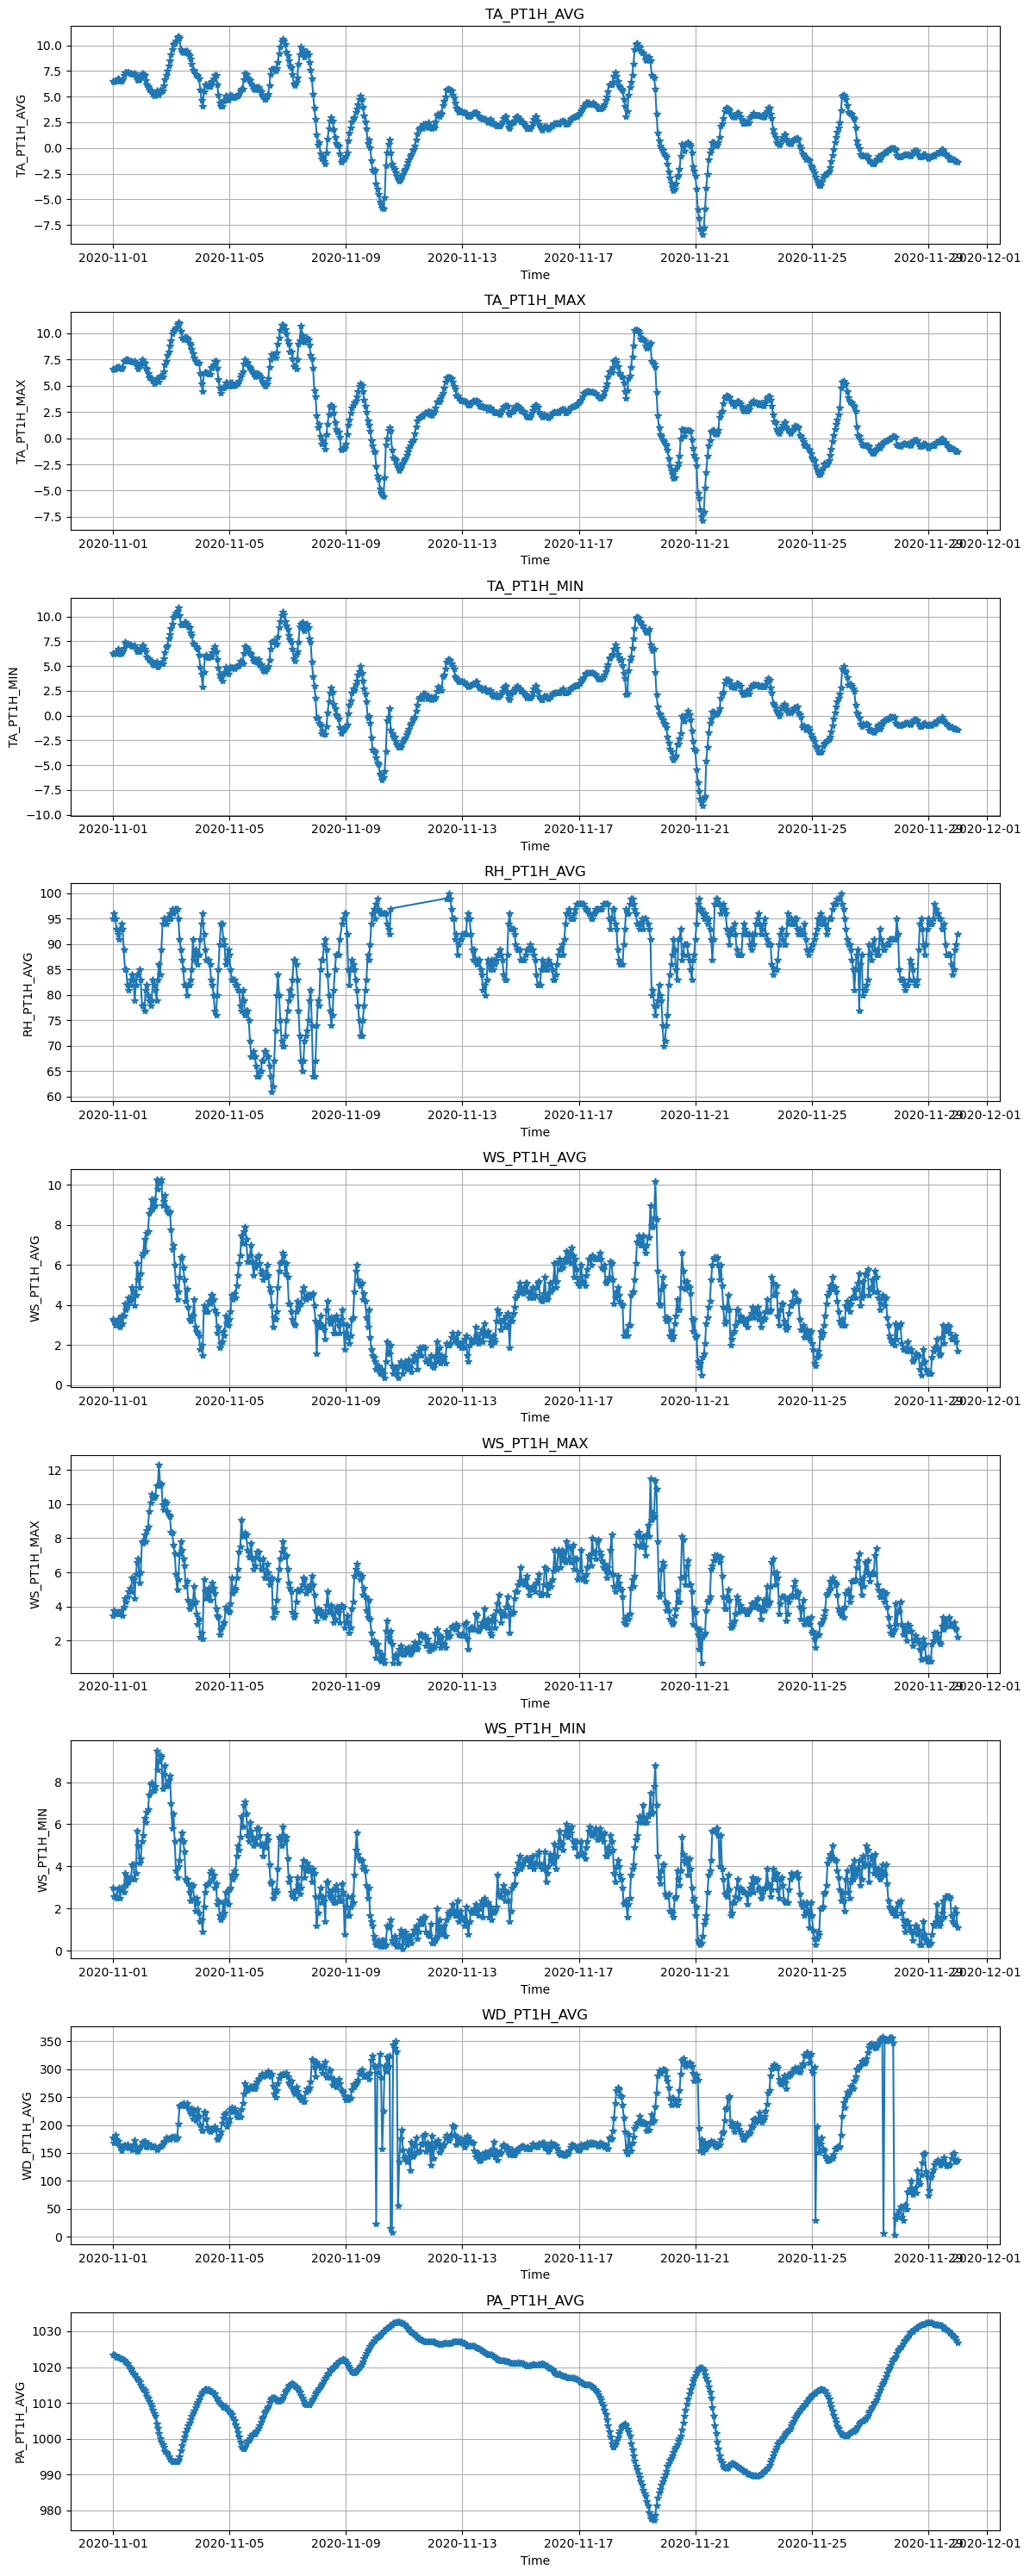

In [33]:
# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extract unique parameter names
parameters = df['ParameterName'].unique()

# Plotting
plt.figure(figsize=(12, 30))

# Iterate over each parameter
for i, parameter in enumerate(parameters, start=1):
    # Extract data for the current parameter
    parameter_data = df[df['ParameterName'] == parameter]
    
    # Plot
    plt.subplot(len(parameters), 1, i)
    plt.plot(parameter_data['Time'], parameter_data['ParameterValue'], marker='*', linestyle='-')
    plt.title(parameter)
    plt.xlabel('Time')
    plt.ylabel(parameter)
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()